# Bat Swing 3D Representation
## Read json file

In [1]:
import json

In [53]:
file = open('json_files/12345645_40081.jsonl')
data = json.load(file)

In [4]:
# print(data.keys())
# print(data['samples_ball'])
ball_pos = list((object['pos'] for object in data['samples_ball'])) 
# print(pos)

In [5]:
bat_head_pos = list((object['head']['pos'] for object in data['samples_bat'])) 
bat_handle_pos = list((object['handle']['pos'] for object in data['samples_bat'])) 

print(bat_head_pos[0], bat_handle_pos[1])

[-2.149525536499129, 0.25995942174528786, 6.326199512559463] [-1.7468809526211155, -1.92720884506143, 4.737430304890496]


## Graph 3D Plot for First Frame

In [8]:
import matplotlib.pyplot as plt

In [7]:
#Get min x, y, and z to set axis limits
min_x = min(min(cur_pos[0] for cur_pos in bat_head_pos), min(cur_pos[0] for cur_pos in bat_handle_pos))
min_y = min(min(cur_pos[1] for cur_pos in bat_head_pos), min(cur_pos[1] for cur_pos in bat_handle_pos))
min_z = min(min(cur_pos[2] for cur_pos in bat_head_pos), min(cur_pos[2] for cur_pos in bat_handle_pos))
print(min_x, min_y, min_z)

-5.181118912076154 -2.9007332616677957 1.1384637762161678


In [8]:
#Get max x, y, and z to set axis limits
max_x = max(max(cur_pos[0] for cur_pos in bat_head_pos), max(cur_pos[0] for cur_pos in bat_handle_pos))
max_y = max(max(cur_pos[1] for cur_pos in bat_head_pos), max(cur_pos[1] for cur_pos in bat_handle_pos))
max_z = max(max(cur_pos[2] for cur_pos in bat_head_pos), max(cur_pos[2] for cur_pos in bat_handle_pos))
print(max_x, max_y, max_z)

2.4854771552711097 4.391943122506753 7.195061425606525


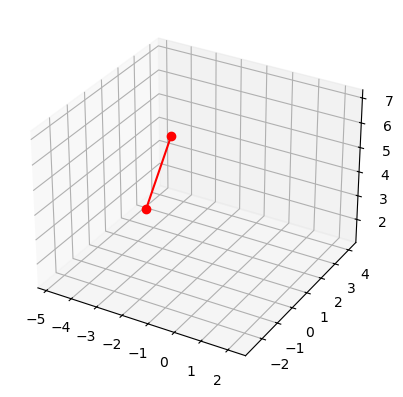

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_values = [bat_head_pos[0][0], bat_handle_pos[0][0]]
y_values = [bat_head_pos[0][1], bat_handle_pos[0][1]]
z_values = [bat_head_pos[0][2], bat_handle_pos[0][2]]

ax.plot(x_values, y_values, z_values, 'ro-')
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
ax.set_zlim(min_z, max_z)
plt.show()

## Use Widget to View All Frames

In [7]:
import ipywidgets as widgets

In [11]:
@widgets.interact(frame=(0, len(bat_head_pos)-1))
def axial_slicer(frame=0):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x_values = [bat_head_pos[frame][0], bat_handle_pos[frame][0]]
    y_values = [bat_head_pos[frame][1], bat_handle_pos[frame][1]]
    z_values = [bat_head_pos[frame][2], bat_handle_pos[frame][2]]

    ax.plot(x_values, y_values, z_values, 'r-')
    plt.xlim(min_x, max_x)
    plt.ylim(min_y, max_y)
    ax.set_zlim(min_z, max_z)
    plt.show()

interactive(children=(IntSlider(value=0, description='frame', max=368), Output()), _dom_classes=('widget-inter…

## 3D Plot for Both Ball and Bat

In [65]:
import bisect
import heapq

In [66]:
#Read data
file = open('json_files/12345645_40081.jsonl')
data = json.load(file)

ball_pos = list((object['pos'] for object in data['samples_ball'])) 
ball_time = list((object['time'] for object in data['samples_ball']))

bat_time = list((object['time'] for object in data['samples_bat'])) 
bat_head_pos = list((object['head']['pos'] for object in data['samples_bat'])) 
bat_handle_pos = list((object['handle']['pos'] for object in data['samples_bat'])) 

In [67]:
#Check length (to make sure there's a time attached to each)
print(len(ball_pos), len(ball_time), len(bat_time), len(bat_head_pos), len(bat_handle_pos))
print(min(ball_time), max(ball_time))
print(min(bat_time), max(bat_time))

276 276 369 369 369
0.0307811 25.2087811
-0.3925578 0.8306792


In [68]:
all_time = list(heapq.merge(ball_time, bat_time)) #merge the 2 lists to get a list of all times

In [69]:
#Get min x, y, and z to set axis limits
min_bat_x = min(min(cur_pos[0] for cur_pos in bat_head_pos), min(cur_pos[0] for cur_pos in bat_handle_pos))
min_bat_y = min(min(cur_pos[1] for cur_pos in bat_head_pos), min(cur_pos[1] for cur_pos in bat_handle_pos))
min_bat_z = min(min(cur_pos[2] for cur_pos in bat_head_pos), min(cur_pos[2] for cur_pos in bat_handle_pos))
min_x = min(min_bat_x, min(cur_pos[0] for cur_pos in ball_pos))
min_y = min(min_bat_y, min(cur_pos[1] for cur_pos in ball_pos))
min_z = min(min_bat_z, min(cur_pos[2] for cur_pos in ball_pos))
print(min_x, min_y, min_z)

#Get max x, y, and z to set axis limits
max_bat_x = max(max(cur_pos[0] for cur_pos in bat_head_pos), max(cur_pos[0] for cur_pos in bat_handle_pos))
max_bat_y = max(max(cur_pos[1] for cur_pos in bat_head_pos), max(cur_pos[1] for cur_pos in bat_handle_pos))
max_bat_z = max(max(cur_pos[2] for cur_pos in bat_head_pos), max(cur_pos[2] for cur_pos in bat_handle_pos))
max_x = max(max_bat_x, max(cur_pos[0] for cur_pos in ball_pos))
max_y = max(max_bat_y, max(cur_pos[1] for cur_pos in ball_pos))
max_z = max(max_bat_z, max(cur_pos[2] for cur_pos in ball_pos))
print(max_x, max_y, max_z)

-123.02992283003434 -2.9007332616677957 0.06301153109674586
48.25335317270798 326.36468750074084 46.026410901350175


In [116]:
# Find the closest bat/ball time measurement for a passed in measurement
def get_closest_time(time, isBat):
    if (isBat):
        index = bisect.bisect_left(bat_time, time)
    else:
        index = bisect.bisect_left(ball_time, time)
        
    if index == 0:
        return 0
    return index - 1 #get time "before"

In [37]:
@widgets.interact(frame=(0, len(all_time)-1))
def axial_slicer(frame=0):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    #Plot bat
    bat_frame = get_closest_time(all_time[frame], True) #Get closest bat frame for the given time
    bat_x_values = [bat_head_pos[bat_frame][0], bat_handle_pos[bat_frame][0]]
    bat_y_values = [bat_head_pos[bat_frame][1], bat_handle_pos[bat_frame][1]]
    bat_z_values = [bat_head_pos[bat_frame][2], bat_handle_pos[bat_frame][2]]
    ax.plot(bat_x_values, bat_y_values, bat_z_values, 'r-')    
    
    #Plot ball
    ball_frame = get_closest_time(all_time[frame], False)
    ball_x_value = ball_pos[ball_frame][0]
    ball_y_value = ball_pos[ball_frame][1]
    ball_z_value = ball_pos[ball_frame][2]
    ax.scatter(ball_x_value, ball_y_value, ball_z_value, 'r')
    
    #Plot Settings
    plt.xlim(min_x, max_x)
    plt.ylim(min_y, max_y)
    ax.set_zlim(min_z, max_z)
    plt.title("Full Ball/Ball Visual")
    plt.show()

interactive(children=(IntSlider(value=0, description='frame', max=644), Output()), _dom_classes=('widget-inter…

In [133]:
#TODO: debug "replay"
print(all_time[-1])
print(get_closest_time(all_time[-1], False))
print(ball_pos[get_closest_time(all_time[-1], False)])

25.2087811
274
[48.0283970945115, 4.298096015388024, 0.167227111188122]


### Around hit

In [134]:
#Estimate close enough value by seeing how different bat handle/ball position is at hit
print(ball_pos[get_closest_time(264, False)])
print(bat_handle_pos[get_closest_time(264, True)])
difference = [a - b for a, b in zip(ball_pos[get_closest_time(264, False)], bat_handle_pos[get_closest_time(264, True)])]
print(difference)

[48.25335317270798, 3.9785945854808817, 0.08448434771116811]
[-3.279877193127228, -0.5294433594961651, 5.265283297456391]
[51.53323036583521, 4.508037944977047, -5.180798949745223]


In [135]:
# Find time before hit --> TODO: fix
close_enough = [75, 25, 15] #[15, 25, 15]
start_frame = -1
end_frame = -1

for i in range(len(all_time)):
    cur_bat_pos = bat_handle_pos[get_closest_time(i, True)]
    cur_ball_pos = ball_pos[get_closest_time(i, False)]
    x_close_enough = abs(cur_bat_pos[0]-cur_ball_pos[0]) < close_enough[0]
    y_close_enough = abs(cur_bat_pos[1]-cur_ball_pos[1]) < close_enough[1]
    z_close_enough = abs(cur_bat_pos[2]-cur_ball_pos[2]) < close_enough[2]
    
    if(x_close_enough and y_close_enough and z_close_enough):
        if(start_frame == -1):
            start_frame = i
#         print(i)
    elif(start_frame != -1):
        end_frame = i
        break;

print(start_frame, end_frame)

20 21


In [136]:
#Manually determined using graph --> TODO: find a way to automate?
start_frame = 223
end_frame = 321

bat_start = get_closest_time(all_time[start_frame], True)
bat_end = get_closest_time(all_time[end_frame], True)
ball_start = get_closest_time(all_time[start_frame], False)
ball_end = get_closest_time(all_time[end_frame], False)

In [137]:
#Adjust list to get max/min in time range: 
bat_hit_head_pos = bat_head_pos[bat_start:bat_end]
bat_hit_handle_pos = bat_handle_pos[bat_start:bat_end]
ball_hit_pos = ball_pos[ball_start:ball_end]

#Get min x, y, and z to set axis limits
min_bat_x = min(min(cur_pos[0] for cur_pos in bat_hit_head_pos), min(cur_pos[0] for cur_pos in bat_hit_handle_pos))
min_bat_y = min(min(cur_pos[1] for cur_pos in bat_hit_head_pos), min(cur_pos[1] for cur_pos in bat_hit_handle_pos))
min_bat_z = min(min(cur_pos[2] for cur_pos in bat_head_pos), min(cur_pos[2] for cur_pos in bat_hit_handle_pos))
hit_min_x = min(min_bat_x, min(cur_pos[0] for cur_pos in ball_hit_pos))
hit_min_y = min(min_bat_y, min(cur_pos[1] for cur_pos in ball_hit_pos))
hit_min_z = min(min_bat_z, min(cur_pos[2] for cur_pos in ball_hit_pos))
print(hit_min_x, hit_min_y, hit_min_z)

#Get max x, y, and z to set axis limits
max_bat_x = max(max(cur_pos[0] for cur_pos in bat_hit_head_pos), max(cur_pos[0] for cur_pos in bat_hit_handle_pos))
max_bat_y = max(max(cur_pos[1] for cur_pos in bat_hit_head_pos), max(cur_pos[1] for cur_pos in bat_hit_handle_pos))
max_bat_z = max(max(cur_pos[2] for cur_pos in bat_hit_head_pos), max(cur_pos[2] for cur_pos in bat_hit_handle_pos))
hit_max_x = max(max_bat_x, max(cur_pos[0] for cur_pos in ball_hit_pos))
hit_max_y = max(max_bat_y, max(cur_pos[1] for cur_pos in ball_hit_pos))
hit_max_z = max(max_bat_z, max(cur_pos[2] for cur_pos in ball_hit_pos))
print(hit_max_x, hit_max_y, hit_max_z)

-5.181118912076154 -2.2917995886471023 1.1384637762161678
2.4854771552711097 19.558734031102208 8.315852611139123


In [138]:
@widgets.interact(frame=(0, end_frame - start_frame - 1))
def axial_slicer(frame=0):
    frame = frame + start_frame
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    #Plot bat
    bat_frame = get_closest_time(all_time[frame], True) #Get closest bat frame for the given time
    bat_x_values = [bat_head_pos[bat_frame][0], bat_handle_pos[bat_frame][0]]
    bat_y_values = [bat_head_pos[bat_frame][1], bat_handle_pos[bat_frame][1]]
    bat_z_values = [bat_head_pos[bat_frame][2], bat_handle_pos[bat_frame][2]]
    ax.plot(bat_x_values, bat_y_values, bat_z_values, 'r-')    
    
    #Plot ball
    ball_frame = get_closest_time(all_time[frame], False)
    ball_x_value = ball_pos[ball_frame][0]
    ball_y_value = ball_pos[ball_frame][1]
    ball_z_value = ball_pos[ball_frame][2]
    ax.scatter(ball_x_value, ball_y_value, ball_z_value, 'r')
    
    #Plot Settings
    plt.xlim(hit_min_x, hit_max_x)
    plt.ylim(hit_min_y, hit_max_y)
    ax.set_zlim(hit_min_z, hit_max_z)
    plt.title("Ball/Ball Visual Around Hit")
    plt.show()

interactive(children=(IntSlider(value=0, description='frame', max=97), Output()), _dom_classes=('widget-intera…

### Full Duration, Ball Changes Color Based on Velocity

In [140]:
import numpy as np
import matplotlib.colors as mcolors

In [141]:
velocity = list((sample['vel'] for sample in data['samples_ball'] if 'vel' in sample)) 
velocity_mag = list(np.linalg.norm(object) for object in velocity) 
print(len(velocity_mag), len(ball_pos))

275 276


In [142]:
min_vel = min(velocity_mag)
max_vel = max(velocity_mag)
print(min_vel, max_vel)

12.43047322780382 105.5944707612867


In [143]:
#Prepare color plot
#Normalize color values for plot
norm = mcolors.Normalize(vmin=min_vel, vmax=max_vel)

# Create a colormap
cmap = plt.get_cmap('viridis')

In [198]:
@widgets.interact(frame=(0, len(all_time)-1))
def axial_slicer(frame=0):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    #Plot bat
    bat_frame = get_closest_time(all_time[frame], True) #Get closest bat frame for the given time
    bat_x_values = [bat_head_pos[bat_frame][0], bat_handle_pos[bat_frame][0]]
    bat_y_values = [bat_head_pos[bat_frame][1], bat_handle_pos[bat_frame][1]]
    bat_z_values = [bat_head_pos[bat_frame][2], bat_handle_pos[bat_frame][2]]
    ax.plot(bat_x_values, bat_y_values, bat_z_values, 'r-')    
    
    #Plot ball
    ball_frame = get_closest_time(all_time[frame], False)
    ball_x_value = ball_pos[ball_frame][0]
    ball_y_value = ball_pos[ball_frame][1]
    ball_z_value = ball_pos[ball_frame][2]
    vel_color = cmap(norm(velocity_mag[ball_frame]))
    ax.scatter(ball_x_value, ball_y_value, ball_z_value, color = vel_color)

    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([]) 
    plt.colorbar(sm, ax=plt.gca(), label='Ball Velocity (mph)')

    #Plot Settings
    plt.xlim(min_x, max_x)
    plt.ylim(min_y, max_y)
    ax.set_zlim(min_z, max_z)
    plt.title("Ball Velocity Visual")
    plt.show()

interactive(children=(IntSlider(value=0, description='frame', max=644), Output()), _dom_classes=('widget-inter…

# Basic Heatmap
Practice reading multiple json files

In [76]:
import os
import pandas as pd #TODO: try using pandas?
import numpy as np

In [77]:
folder_path = 'json_files'
ball_data = []

# Iterate over all files in the specified folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jsonl'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as json_file:
            data = json.load(json_file)
            ball_data.append(data['samples_ball'])

# Print the contents of all JSON files
# for i, content in enumerate(ball_data):
#     print(f"Contents of file {i+1}:")
#     print(json.dumps(content, indent=4))

In [149]:
final_ball = list(object[-1] for object in ball_data)
print(final_ball)

[{'time': 5.2969426, 'pos': [4.633062726435452, 55.91843728058752, 4.866601116612892], 'vel': [1.9454339343413554, 30.846870164547756, -12.680458027489962], 'acc': [-0.335621613684003, -4.7818419894218485, -20.88827258347642]}, {'time': 19.0775172, 'pos': [-2.1311351685781634, 62.01813038665839, 5.850969743377439], 'vel': [22.96737659508755, -9.575049019898564, -10.668613467607466], 'acc': [-2.5441768090614874, 1.063228637076624, -21.97686889934325]}, {'time': 25.2087811, 'pos': [48.25335317270798, 3.9785945854808817, 0.08448434771116811], 'vel': [7.1206618960078325, -10.10980362954756, -2.8565404630708957], 'acc': [-0.1446405267095624, 0.5356534204985212, -21.99775500784769]}]


In [150]:
final_pos = list(object['pos'] for object in final_ball)
print(final_pos)

[[4.633062726435452, 55.91843728058752, 4.866601116612892], [-2.1311351685781634, 62.01813038665839, 5.850969743377439], [48.25335317270798, 3.9785945854808817, 0.08448434771116811]]


In [151]:
#idk if there's a better way to plot directly since it needs x and y separately
x_coords = [pos[0] for pos in final_pos] 
y_coords = [pos[1] for pos in final_pos]

## Plot

In [152]:
import imageio.v2 as iio
from scipy.ndimage import zoom

In [153]:
#get baseball field image to put in background
baseball_field_img = iio.imread("baseball_field.jpeg") #just to test concept, axis does NOT align lol
scale = 0.2 #arbitrary number for now
baseball_field_img = zoom(baseball_field_img, (scale, scale, 1)) 

In [157]:
#change point color based on velocity
# I think there's a better way by setting the velocity as the 3rd parameter in the array then using cmap
velocity = list(object['vel'] for object in final_ball)
velocity_mag = list(np.linalg.norm(object) for object in velocity) 
print(velocity_mag)

def getColor(vel_mag):
    if (vel_mag < 10):
        return 'r'
    elif (vel_mag < 20):
        return 'y'
    elif (vel_mag < 30):
        return 'g'
    elif (vel_mag < 40):
        return 'c'
    else:
        return 'b'

velocity_color = list(getColor(cur_mag) for cur_mag in velocity_mag)
print(velocity_color)

[33.40820450021653, 27.07399609801352, 12.69140570159319]
['c', 'g', 'y']


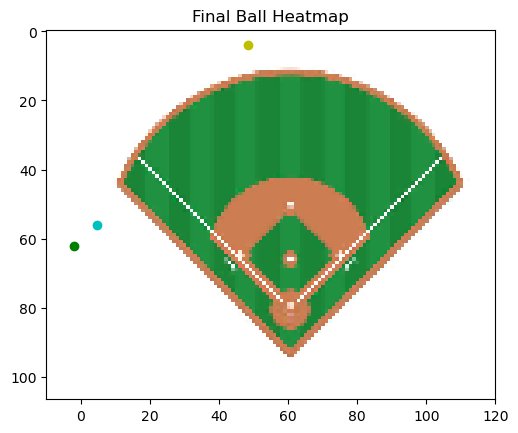

In [158]:
for i in range(len(x_coords)):
    plt.plot(x_coords[i], y_coords[i], velocity_color[i] + 'o')
plt.imshow(baseball_field_img)
plt.xlim(-10, 120)
plt.title('Final Ball Heatmap')
plt.show()

# Data Visualization
## Pitch Type and Result Matrix

In [145]:
import os
import numpy as np

In [193]:
# Read pitch type and result data
hits_folder_path = '/Users/tiffanynguyen/wsd-data/wsd-hits'
no_hits_folder_path = '/Users/tiffanynguyen/wsd-data/wsd-nohit'
pitch_type_data = []
pitch_result_data = []

for filename in os.listdir(hits_folder_path):
    if filename.endswith('.jsonl'):
        file_path = os.path.join(hits_folder_path, filename)
        with open(file_path, 'r') as json_file:
            data = json.load(json_file)
            # only read data if it has both pitch type and pitch result
            if(data['summary_acts']['pitch']['type'] and data['summary_acts']['pitch']['result']):
                pitch_type_data.append(data['summary_acts']['pitch']['type'])
                pitch_result_data.append(data['summary_acts']['pitch']['result'])
                
for filename in os.listdir(no_hits_folder_path):
    if filename.endswith('.jsonl'):
        file_path = os.path.join(no_hits_folder_path, filename)
        with open(file_path, 'r') as json_file:
            data = json.load(json_file)
            # only read data if it has both pitch type and pitch result
            if(data['summary_acts']['pitch']['type'] and data['summary_acts']['pitch']['result']):
                pitch_type_data.append(data['summary_acts']['pitch']['type'])
                pitch_result_data.append(data['summary_acts']['pitch']['result'])

print(pitch_type_data)
print(pitch_result_data)

['Slider', 'Cutter', 'Slider', 'Slider', 'Slider', 'Slider', 'FourSeamFastball', 'Sinker', 'Cutter', 'Slider', 'FourSeamFastball', 'Curveball', 'Sinker', 'Sinker', 'Sinker', 'Sinker', 'Sinker', 'Sinker', 'Curveball', 'Cutter', 'Sinker', 'Cutter', 'Slider', 'Sinker', 'Sinker']
['HitIntoPlay', 'HitIntoPlay', 'HitIntoPlay', 'HitIntoPlay', 'HitIntoPlay', 'HitIntoPlay', 'HitIntoPlay', 'HitIntoPlay', 'Ball', 'Ball', 'Strike', 'Ball', 'Ball', 'Ball', 'Ball', 'Ball', 'Ball', 'Ball', 'Ball', 'Ball', 'Ball', 'Ball', 'Ball', 'Ball', 'Ball']


In [194]:
# Get possible types
pitch_type_types = list(set(pitch_type_data))
pitch_result_types = list(set(pitch_result_data))
print("Pitch Types:", pitch_type_types)
print("Pitch Results:", pitch_result_types)

Pitch Types: ['FourSeamFastball', 'Cutter', 'Curveball', 'Sinker', 'Slider']
Pitch Results: ['Ball', 'HitIntoPlay', 'Strike']


In [196]:
# Store data in matrix
pitch_matrix = np.zeros([len(pitch_type_types), len(pitch_result_types)])
for i in range(len(pitch_type_data)):
    pitch_matrix[pitch_type_types.index(pitch_type_data[i])][pitch_result_types.index(pitch_result_data[i])] += 1
print(pitch_matrix)

[[0. 1. 1.]
 [3. 1. 0.]
 [2. 0. 0.]
 [9. 1. 0.]
 [2. 5. 0.]]


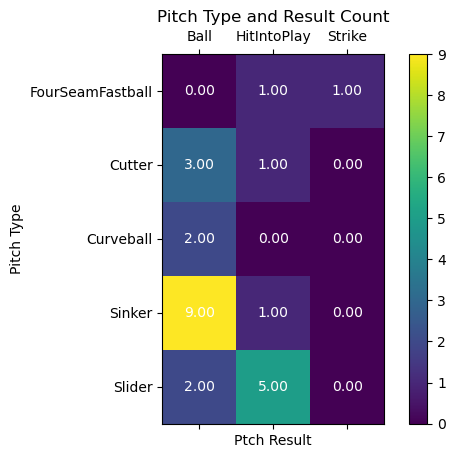

In [197]:
figure = plt.figure()
ax = figure.add_subplot(111)

# Plot Matrix
cax = ax.matshow(pitch_matrix, cmap='viridis')

# Add count to each cell
for i in range(pitch_matrix.shape[0]):
    for j in range(pitch_matrix.shape[1]):
        plt.text(j, i, f'{pitch_matrix[i, j]:.2f}', ha='center', va='center', color='white')

# Label type of pitch/result
plt.xticks(range(len(pitch_result_types)), pitch_result_types)
plt.yticks(range(len(pitch_type_types)), pitch_type_types)

# Set plot titles and color
plt.colorbar(cax)
plt.title('Pitch Type and Result Count')
plt.xlabel('Ptch Result')
plt.ylabel('Pitch Type')
plt.show()

## Pitch Speed Histogram

In [243]:
# TODO: increase data sample size
pitch_speed = [[] for _ in range(len(pitch_type_types))]

for filename in os.listdir(hits_folder_path):
    if filename.endswith('.jsonl'):
        file_path = os.path.join(hits_folder_path, filename)
        with open(file_path, 'r') as json_file:
            data = json.load(json_file)
            # only read data if it has both pitch type and pitch result
            if(data['summary_acts']['pitch']['type'] and data['summary_acts']['pitch']['speed']['mph']):
                index = pitch_type_types.index(data['summary_acts']['pitch']['type'])
                pitch_speed[index].append(data['summary_acts']['pitch']['speed']['mph'])

for filename in os.listdir(no_hits_folder_path):
    if filename.endswith('.jsonl'):
        file_path = os.path.join(no_hits_folder_path, filename)
        with open(file_path, 'r') as json_file:
            data = json.load(json_file)
            # only read data if it has both pitch type and pitch result
            if(data['summary_acts']['pitch']['type'] and data['summary_acts']['pitch']['speed']['mph']):
                index = pitch_type_types.index(data['summary_acts']['pitch']['type'])
                pitch_speed[index].append(data['summary_acts']['pitch']['speed']['mph'])

print(pitch_speed)

[[97.0, 94.0], [90.0, 87.0, 89.0, 89.0], [77.0, 80.0], [91.0, 95.0, 96.0, 95.0, 92.0, 95.0, 90.0, 95.0, 95.0, 90.0], [80.0, 82.0, 71.0, 80.0, 79.0, 87.0, 86.0]]


In [208]:
min_speed = min(min(row) for row in pitch_speed)
print(min_speed)
max_speed = max(max(row) for row in pitch_speed)
print(max_speed)

71.0
97.0


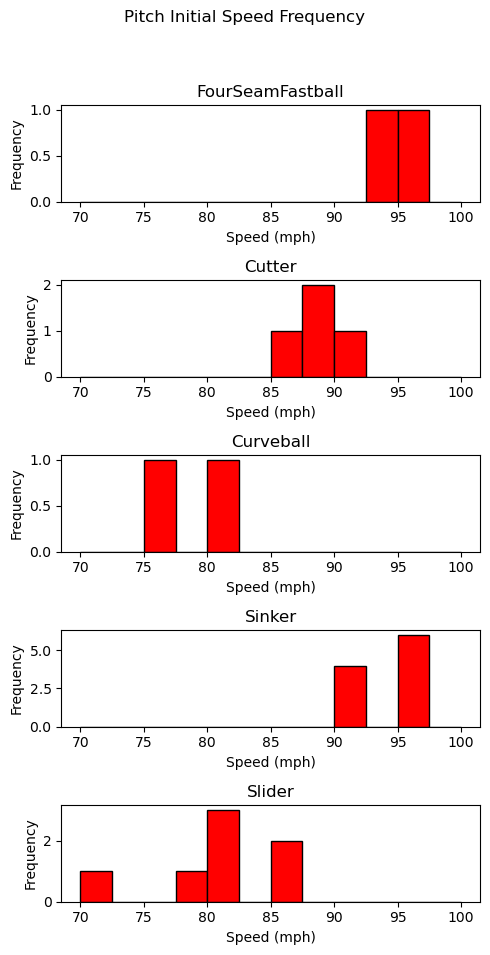

In [238]:
plt.figure(figsize=(5, 10))
plt.suptitle('Pitch Initial Speed Frequency') #label overall plot

min_speed = min(min(speed) for speed in pitch_speed)  # Calculate the minimum speed
max_speed = max(max(speed) for speed in pitch_speed)

for i in range(len(pitch_type_types)):
    cur_subplot = plt.subplot(len(pitch_type_types), 1, i + 1) #vertically align subplots
    plt.hist(pitch_speed[i], bins=12, range=(round(min_speed/5)*5, (round(max_speed/5)+1)*5), color="r", edgecolor = "black", label="Red")  # Plot histogram

    # Set subplot titles
    cur_subplot.set_title(pitch_type_types[i])
    cur_subplot.set_xlabel("Speed (mph)") 
    cur_subplot.set_ylabel("Frequency")
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Violin/Box Plot Pitch Spin for Hits vs Miss

In [15]:
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Read speed data
hit_spin = []
hits_folder_path = '/Users/tiffanynguyen/wsd-data/wsd-hits'
for filename in os.listdir(hits_folder_path):
    if filename.endswith('.jsonl'):
        file_path = os.path.join(hits_folder_path, filename)
        with open(file_path, 'r') as json_file:
            data = json.load(json_file)
            # only read data if it has hit
            if(data['summary_acts']['hit']['eventId'] != {} and data['summary_acts']['pitch']['spin']['rpm']):
                hit_spin.append(data['summary_acts']['pitch']['spin']['rpm'])
                
no_hit_spin = []
no_hits_folder_path = '/Users/tiffanynguyen/wsd-data/wsd-nohit'
for filename in os.listdir(no_hits_folder_path):
    if filename.endswith('.jsonl'):
        file_path = os.path.join(no_hits_folder_path, filename)
        with open(file_path, 'r') as json_file:
            data = json.load(json_file)
            # only read data if it doesn't have pitch
            if(data['summary_acts']['hit']['eventId'] == {} and data['summary_acts']['pitch']['spin']['rpm']):
                no_hit_spin.append(data['summary_acts']['pitch']['spin']['rpm'])

print(hit_spin)
print(no_hit_spin)

[2720, 2240, 2240, 2360, 2390, 1910, 2150, 2390, 2380, 2410, 2510, 2140, 2530, 2140, 1830, 2910, 2680, 340, 2190, 2090, 2290, 2290, 2480, 2100, 2340, 2420, 2410, 2370, 2360, 2070, 2240, 2130, 2580, 2580, 2080, 2260, 700, 2550, 1650, 2480, 2300, 2260, 2490, 50, 2500, 1240, 2280, 2250, 2080]
[2430, 2860, 2090, 2440, 2380, 2490, 2280, 2230, 2950, 2360, 2330, 2150, 10, 2220, 2310, 2310, 2140, 2200, 1640, 2240, 2990, 2510, 2410, 2670, 2390, 2330, 1770, 2470, 2170, 2440, 1670, 2220, 3040, 70, 2300]


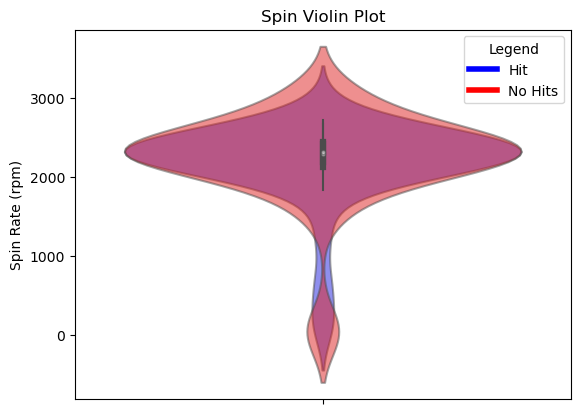

In [32]:
sns.violinplot(y=hit_spin, palette=['blue'])
sns.violinplot(y=no_hit_spin, palette=['red'])

for violin in plt.gca().collections:
    violin.set_alpha(0.5)
    
plt.title('Spin Violin Plot')
plt.ylabel('Spin Rate (rpm)')
handles = [plt.Line2D([0], [0], color='blue', lw=4, label='Hit'),
           plt.Line2D([0], [0], color='red', lw=4, label='No Hits')]
plt.legend(handles=handles, title='Legend')
plt.show()

<Figure size 640x480 with 0 Axes>

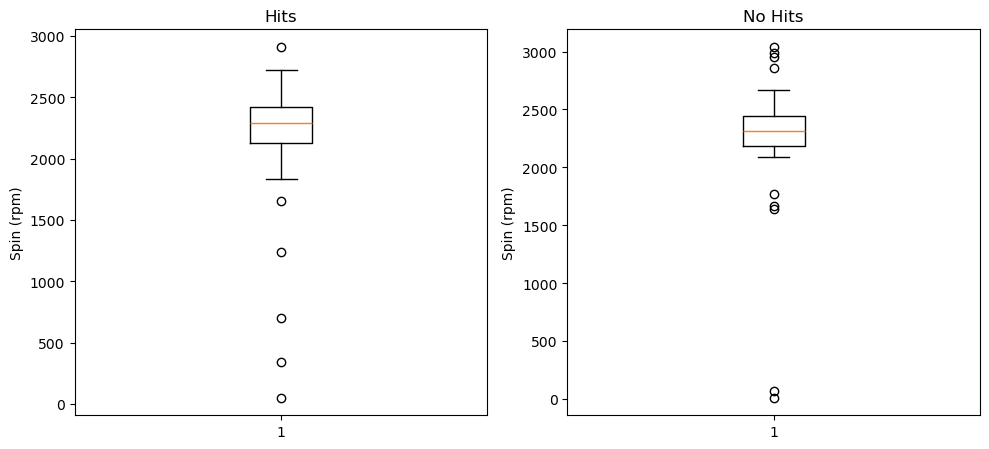

In [40]:
plt.suptitle('Spin Box Plot')
fig, (hit_subplot, no_hit_subplot) = plt.subplots(1, 2, figsize=(10, 5)) #horizontally align subplots

hit_subplot.boxplot(hit_spin)
hit_subplot.set_title("Hits")
hit_subplot.set_ylabel("Spin (rpm)")

no_hit_subplot.boxplot(no_hit_spin)
no_hit_subplot.set_title("No Hits")
no_hit_subplot.set_ylabel("Spin (rpm)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Velocity and Final Position Heatmap

In [43]:
import numpy as np

In [66]:
hit_speed = []
ball_final_pos = []
#TODO: read all data once, then just read necessary part from that rather than parsing json each time
for filename in os.listdir(hits_folder_path):
    if filename.endswith('.jsonl'):
        file_path = os.path.join(hits_folder_path, filename)
        with open(file_path, 'r') as json_file:
            data = json.load(json_file)
            # only read data if it has all necessary data
            cur_hit_speed = data['summary_acts']['hit']['speed']['mph']
            cur_final_pos = data['samples_ball'][-1]['pos']
            if(cur_hit_speed != None and cur_final_pos != None):
                hit_speed.append(cur_hit_speed)
                ball_final_pos.append(cur_final_pos)

#TODO: use class or struct instead of parallel array
print("Hit Speed:", hit_speed)
# print("Ball Final Position:", ball_final_pos)

Hit Speed: [84.0, 78.0, 43.0, 75.0, 96.0, 67.0, 76.0, 89.0, 98.0, 92.0, 102.0, 95.0, 89.0, 113.0, 70.0, 76.0, 77.0, 77.0, 77.0, 91.0, 73.0, 90.0, 83.0, 78.0, 69.0, 78.0, 88.0, 96.0, 100.0, 72.0, 80.0, 83.0, 83.0, 74.0, 73.0, 89.0, 87.0, 71.0, 85.0, 92.0, 57.0, 99.0, 100.0, 79.0, 81.0, 107.0, 87.0, 83.0, 96.0]


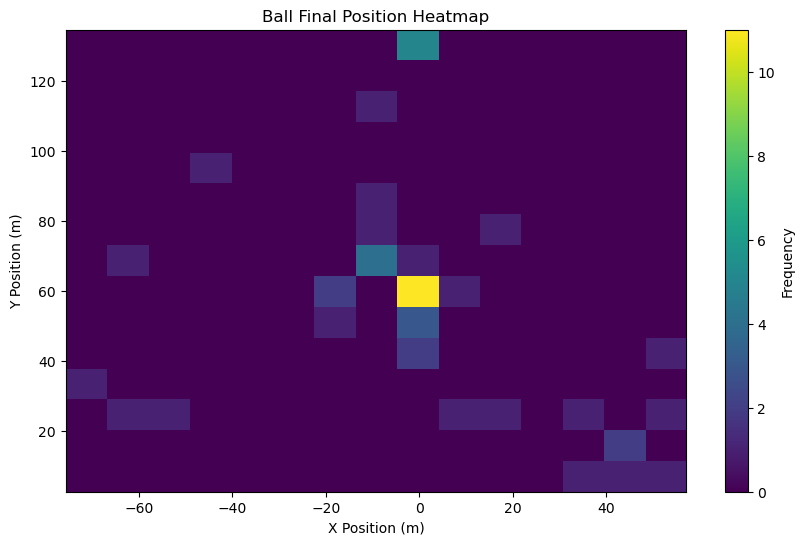

In [67]:
# Ball Final Position Heatmap
ball_final_pos_np = np.array(ball_final_pos)
plt.figure(figsize=(10, 6))
heatmap, xedges, yedges = np.histogram2d(ball_final_pos_np[:,0], ball_final_pos_np[:,1], bins=15)

plt.imshow(heatmap.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Frequency')
plt.title('Ball Final Position Heatmap')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.show()

#TODO: show field below

### Only show frequency for a given velocity range

In [70]:
import ipywidgets as widgets
from ipywidgets import interact_manual

In [82]:
# @interact(min_hit_speed=(min(hit_speed), max(hit_speed))), max_hit_speed=(min(hit_speed), max(hit_speed))
@interact_manual(min_hit_speed=widgets.FloatSlider(min=min(hit_speed), max=max(hit_speed), value=min(hit_speed), description='Min Hit Speed'),
          max_hit_speed=widgets.FloatSlider(min=min(hit_speed), max=max(hit_speed), value=max(hit_speed), description='Max Hit Speed'))
def axial_slicer(min_hit_speed=min(hit_speed), max_hit_speed=max(hit_speed)):
    if(min_hit_speed > max_hit_speed):
        print("Min hit speed must be smaller than max hit speed")
        return
    
    in_range_ball_final_pos = []
    #Get positions where hit speed is in range
    for i in range(len(hit_speed)):
        if(hit_speed[i] > min_hit_speed and hit_speed[i] < max_hit_speed):
            in_range_ball_final_pos.append(ball_final_pos[i])
    
    #plot
    in_range_ball_final_pos = np.array(in_range_ball_final_pos)
    plt.figure(figsize=(10, 6))
    heatmap, xedges, yedges = np.histogram2d(in_range_ball_final_pos[:,0], in_range_ball_final_pos[:,1], range=[[min(ball_final_pos_np[:, 0]), max(ball_final_pos_np[:, 0])], [min(ball_final_pos_np[:, 1]), max(ball_final_pos_np[:, 1])]], bins=15)

    plt.imshow(heatmap.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], origin='lower', cmap='viridis', aspect='auto')
    
    plt.colorbar(label='Frequency')
    plt.title('Ball Final Position Heatmap')
    plt.xlabel('X Position (m)')
    plt.ylabel('Y Position (m)')
    plt.show()

interactive(children=(FloatSlider(value=43.0, description='Min Hit Speed', max=113.0, min=43.0), FloatSlider(v…

### Using Plotly

In [88]:
import plotly.express as px
import pandas as pd

In [94]:
df = pd.DataFrame(ball_final_pos_np[:, :2], columns=["X position", "Y position"])

fig = px.density_heatmap(df, x="X position", y="Y position", text_auto=True)
fig.show()